![example](images/director_shot.jpeg)

# Box Office Trends: Strategic Insights for Microsoft's New Movie Studio


**Author:** Prince
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

Microsoft wants to start its invesment in the original video content creation  so as to come uptodate with the market trends.Being that they want to understand the business before investing they will have to explore what type of films are currently doing good in the box office.This findings will be crucient as they can be used by new head of Microsoft movie studios to make a deecision on what type of films he or she should crreate.

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

The data came from :
* Box Office MojoLinks to an external site.
* IMDBLinks to an external site.
* Rotten TomatoesLinks to an external site.
* TheMovieDBLinks to an external site.
* The Numbers
which are all renowed movie data sites.
***
The datasets have several veriabels i.e tconst,primary_title,original_title,start_year,runtime_minutes,genres and so on.
***
You should know that we have all this veriabel but our main and terget veriabel is sales price(the determinant)
***

#Variable		            #Why It Matters
* domestic_gross		        Primary measure of revenue (use as SalePrice)
* foreign_gross		        Optional – for calculating total worldwide revenue
* runtime_minutes		    Analyze success based on movie length
* genres		                Grouping and comparison by genre
* average_rating	            Does higher quality = higher earnings?
* num_votes		            Use to filter obscure or less relevant films
* start_year                 For time series trends and filtering

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [3]:
# Here you run your code to explore the data
file_path1=r"C:\Users\Administrator\Downloads\imdb.title.basics.csv.gz"
file_path2=r"C:\Users\Administrator\Downloads\imdb.title.ratings.csv.gz"
file_path3=r"C:\Users\Administrator\Downloads\bom.movie_gross.csv.gz"

In [4]:
imdb_title_basic=pd.read_csv(file_path1)
imdb_title_rating=pd.read_csv(file_path2)
bom_movie_gross=pd.read_csv(file_path3)


In [5]:
imdb_title_basic.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
imdb_title_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [7]:
imdb_title_rating.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [8]:
imdb_title_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [9]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [10]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

Joining the data set

In [11]:
# Here you run your code to clean the data
df=pd.merge(imdb_title_basic,imdb_title_rating,on='tconst',how='inner')
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [12]:
bom_movie_gross=bom_movie_gross.rename(columns={'title':'primary_title','year':'start_year'})
bom_movie_gross.head()

,primary_title,studio,domestic_gross,foreign_gross,start_year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [13]:
df=pd.merge(df,bom_movie_gross,on=['primary_title','start_year'],how='inner')
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,"1,019.4"


In [14]:
df.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross
count,1847.000000,1843.000000,1847.000000,1.847000e+03,1.837000e+03
mean,2013.972388,110.770483,6.422794,9.166869e+04,4.278809e+07
std,2.513624,19.851675,1.004203,1.502088e+05,7.724321e+07
min,2010.000000,25.000000,1.600000,6.000000e+00,3.000000e+02
25%,2012.000000,96.000000,5.800000,7.642000e+03,5.820000e+05
50%,2014.000000,107.000000,6.500000,3.546500e+04,1.070000e+07
75%,2016.000000,122.000000,7.100000,1.055535e+05,5.190000e+07
max,2018.000000,189.000000,8.800000,1.841066e+06,7.001000e+08


Data cleaning

In [15]:
df.shape

(1847, 11)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1847 entries, 0 to 1846
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           1847 non-null   object 
 1   primary_title    1847 non-null   object 
 2   original_title   1847 non-null   object 
 3   start_year       1847 non-null   int64  
 4   runtime_minutes  1843 non-null   float64
 5   genres           1845 non-null   object 
 6   averagerating    1847 non-null   float64
 7   numvotes         1847 non-null   int64  
 8   studio           1845 non-null   object 
 9   domestic_gross   1837 non-null   float64
 10  foreign_gross    1269 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 158.9+ KB


Checking extrenous values

In [17]:
duplicates=df[df.duplicated()]
len(duplicates)

0

In [18]:
for cols in df.columns:
    print(cols,'\n',df[cols].value_counts(normalize=True))

tconst 
 tconst
tt0315642    0.000541
tt3062096    0.000541
tt3045616    0.000541
tt3043630    0.000541
tt3041550    0.000541
               ...   
tt1657507    0.000541
tt1655460    0.000541
tt1655442    0.000541
tt1655441    0.000541
tt9151704    0.000541
Name: proportion, Length: 1847, dtype: float64
primary_title 
 primary_title
Dancer                       0.001083
Leap Year                    0.001083
A Better Life                0.001083
The Call                     0.001083
The Artist                   0.001083
                               ...   
Freeheld                     0.000541
Colombiana                   0.000541
Wanderlust                   0.000541
The Age of Adaline           0.000541
Burn the Stage: The Movie    0.000541
Name: proportion, Length: 1822, dtype: float64
original_title 
 original_title
Dancer                       0.001083
The Tempest                  0.001083
Jai Ho                       0.001083
Gone                         0.001083
The Negotiation 

Remove the white spaces

In [19]:
df.columns=df.columns.str.strip()
df=df.apply(lambda x:x.str.lower().str.strip()if x.dtype=='object'else x)
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross
0,tt0315642,wazir,wazir,2016,103.0,"action,crime,drama",7.1,15378,relbig.,1100000.0,NaN
1,tt0337692,on the road,on the road,2012,124.0,"adventure,drama,romance",6.1,37886,ifc,744000.0,8000000
2,tt0359950,the secret life of walter mitty,the secret life of walter mitty,2013,114.0,"adventure,comedy,drama",7.3,275300,fox,58200000.0,129900000
3,tt0365907,a walk among the tombstones,a walk among the tombstones,2014,114.0,"action,crime,drama",6.5,105116,uni.,26300000.0,26900000
4,tt0369610,jurassic world,jurassic world,2015,124.0,"action,adventure,sci-fi",7.0,539338,uni.,652300000.0,"1,019.4"


# Dealing with missing values(columns with missing values)
*  runtime_minutes -1843 values
*  genres  -1845
*  studio -1845
*  domestic_gross -1837
*  foreign_gross-1269 

In [20]:
df['runtime_minutes'].value_counts()

runtime_minutes
100.0    48
107.0    48
98.0     47
106.0    47
105.0    47
         ..
66.0      1
174.0     1
63.0      1
77.0      1
55.0      1
Name: count, Length: 116, dtype: int64

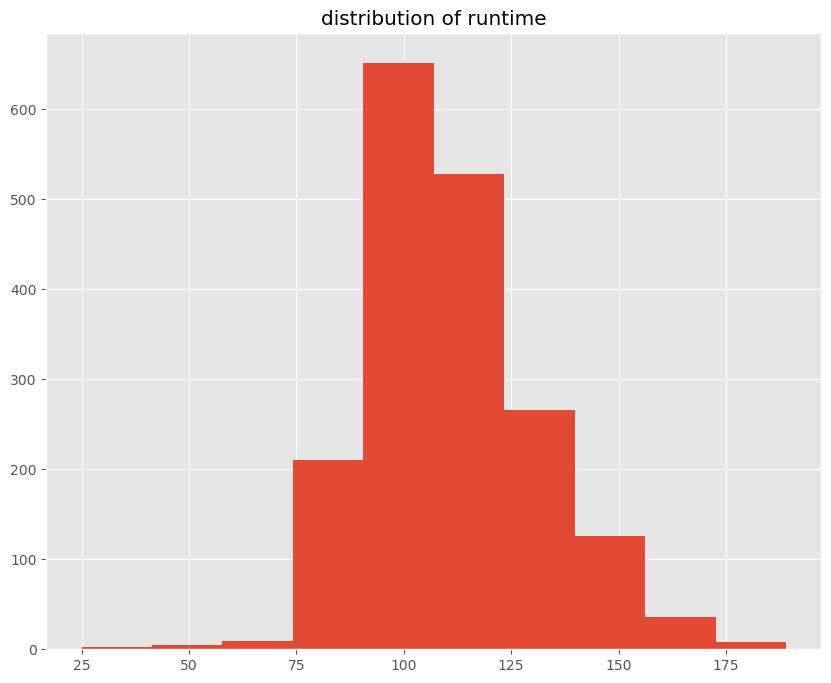

In [21]:
#sns.histplot('runtime_minutes',bins=5)
#plt.show()
fig,ax=plt.subplots(figsize=(10,8))
ax.hist(df['runtime_minutes'],bins=10)
plt.title('distribution of runtime')
plt.show()

It has a normal distribution so i will fill the missing values using thei mean

In [22]:
df['runtime_minutes'].mean()

110.77048290830169

In [23]:
df['runtime_minutes']=df['runtime_minutes'].fillna(df['runtime_minutes'].mean())

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1847 entries, 0 to 1846
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           1847 non-null   object 
 1   primary_title    1847 non-null   object 
 2   original_title   1847 non-null   object 
 3   start_year       1847 non-null   int64  
 4   runtime_minutes  1847 non-null   float64
 5   genres           1845 non-null   object 
 6   averagerating    1847 non-null   float64
 7   numvotes         1847 non-null   int64  
 8   studio           1845 non-null   object 
 9   domestic_gross   1837 non-null   float64
 10  foreign_gross    1269 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 158.9+ KB


In [25]:
df['genres'].value_counts().head(10)

genres
drama                         94
comedy,drama,romance          90
comedy,drama                  71
adventure,animation,comedy    68
drama,romance                 60
comedy                        59
comedy,romance                55
documentary                   46
action,adventure,sci-fi       45
action,adventure,drama        35
Name: count, dtype: int64

I will fill the missing values with 'uknown' that will later be treated as category on itself

In [26]:
df['genres']=df['genres'].fillna('Uknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1847 entries, 0 to 1846
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           1847 non-null   object 
 1   primary_title    1847 non-null   object 
 2   original_title   1847 non-null   object 
 3   start_year       1847 non-null   int64  
 4   runtime_minutes  1847 non-null   float64
 5   genres           1847 non-null   object 
 6   averagerating    1847 non-null   float64
 7   numvotes         1847 non-null   int64  
 8   studio           1845 non-null   object 
 9   domestic_gross   1837 non-null   float64
 10  foreign_gross    1269 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 158.9+ KB


In [27]:
df['studio'].value_counts().head(10)

studio
uni.    124
fox     113
wb      102
bv       84
sony     81
par.     78
lgf      78
eros     72
foxs     57
ifc      53
Name: count, dtype: int64

In [28]:
df['studio'].isnull().sum()

2

Since it has 'uni' as the mode i will use it to replace the issing values

In [29]:
df['studio']=df['studio'].fillna('uni.')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1847 entries, 0 to 1846
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           1847 non-null   object 
 1   primary_title    1847 non-null   object 
 2   original_title   1847 non-null   object 
 3   start_year       1847 non-null   int64  
 4   runtime_minutes  1847 non-null   float64
 5   genres           1847 non-null   object 
 6   averagerating    1847 non-null   float64
 7   numvotes         1847 non-null   int64  
 8   studio           1847 non-null   object 
 9   domestic_gross   1837 non-null   float64
 10  foreign_gross    1269 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 158.9+ KB


In [31]:
df['foreign_gross'].isnull().sum()

578

Since they are many i will first check the distribution

In [32]:
df['foreign_gross']=pd.to_numeric(df['foreign_gross'].str.replace(',','',regex=False))

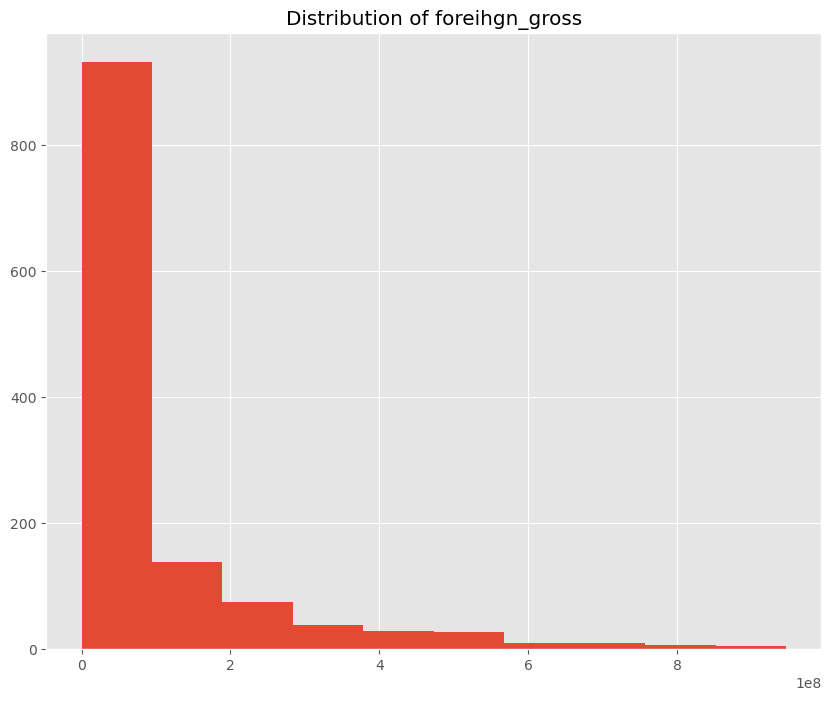

In [33]:
fig,ax=plt.subplots(figsize=(10,8))
ax.hist(df['foreign_gross'],bins=10)
plt.title('Distribution of foreihgn_gross')
plt.show()

The distribution is skiewed positively so i will use the median to fill the missing values

In [34]:
df['foreign_gross']=df['foreign_gross'].fillna(df['foreign_gross'].median())

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1847 entries, 0 to 1846
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           1847 non-null   object 
 1   primary_title    1847 non-null   object 
 2   original_title   1847 non-null   object 
 3   start_year       1847 non-null   int64  
 4   runtime_minutes  1847 non-null   float64
 5   genres           1847 non-null   object 
 6   averagerating    1847 non-null   float64
 7   numvotes         1847 non-null   int64  
 8   studio           1847 non-null   object 
 9   domestic_gross   1837 non-null   float64
 10  foreign_gross    1847 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 158.9+ KB


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [36]:
# Here you run your code to model the data
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross
0,tt0315642,wazir,wazir,2016,103.0,"action,crime,drama",7.1,15378,relbig.,1100000.0,31300000.0
1,tt0337692,on the road,on the road,2012,124.0,"adventure,drama,romance",6.1,37886,ifc,744000.0,8000000.0
2,tt0359950,the secret life of walter mitty,the secret life of walter mitty,2013,114.0,"adventure,comedy,drama",7.3,275300,fox,58200000.0,129900000.0
3,tt0365907,a walk among the tombstones,a walk among the tombstones,2014,114.0,"action,crime,drama",6.5,105116,uni.,26300000.0,26900000.0
4,tt0369610,jurassic world,jurassic world,2015,124.0,"action,adventure,sci-fi",7.0,539338,uni.,652300000.0,1019.4


creating a new column total_gross

In [37]:
df['total_gross']=df['domestic_gross']+df['foreign_gross']

In [38]:
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,total_gross
0,tt0315642,wazir,wazir,2016,103.0,"action,crime,drama",7.1,15378,relbig.,1100000.0,31300000.0,32400000.0
1,tt0337692,on the road,on the road,2012,124.0,"adventure,drama,romance",6.1,37886,ifc,744000.0,8000000.0,8744000.0
2,tt0359950,the secret life of walter mitty,the secret life of walter mitty,2013,114.0,"adventure,comedy,drama",7.3,275300,fox,58200000.0,129900000.0,188100000.0
3,tt0365907,a walk among the tombstones,a walk among the tombstones,2014,114.0,"action,crime,drama",6.5,105116,uni.,26300000.0,26900000.0,53200000.0
4,tt0369610,jurassic world,jurassic world,2015,124.0,"action,adventure,sci-fi",7.0,539338,uni.,652300000.0,1019.4,652301019.4


Ill then dropp the other two columns

In [39]:
df=df.drop(['domestic_gross','foreign_gross'],axis=1)
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,total_gross
0,tt0315642,wazir,wazir,2016,103.0,"action,crime,drama",7.1,15378,relbig.,32400000.0
1,tt0337692,on the road,on the road,2012,124.0,"adventure,drama,romance",6.1,37886,ifc,8744000.0
2,tt0359950,the secret life of walter mitty,the secret life of walter mitty,2013,114.0,"adventure,comedy,drama",7.3,275300,fox,188100000.0
3,tt0365907,a walk among the tombstones,a walk among the tombstones,2014,114.0,"action,crime,drama",6.5,105116,uni.,53200000.0
4,tt0369610,jurassic world,jurassic world,2015,124.0,"action,adventure,sci-fi",7.0,539338,uni.,652301019.4


In [40]:
df['start_year'].value_counts()

start_year
2016    242
2015    232
2011    214
2012    211
2014    203
2013    193
2010    191
2017    190
2018    171
Name: count, dtype: int64

Checking the corelation between total_gross and other veriabel-how dose they affect it

***
Correlation betweeen total_gross and start_year

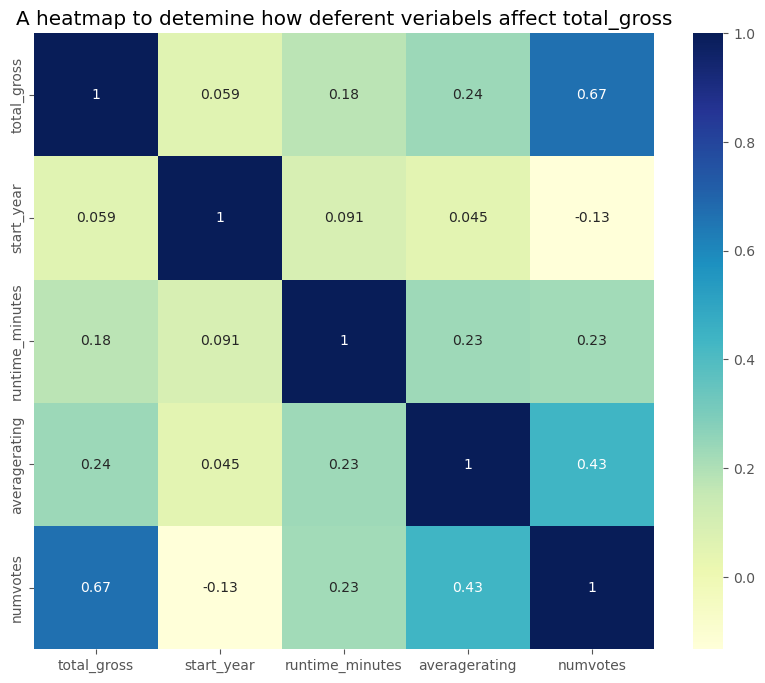

In [48]:
cols=['total_gross','start_year','runtime_minutes','averagerating','numvotes']
plt.figure(figsize=(10,8))
sns.heatmap(df[cols].corr(),annot=True,cmap='YlGnBu')
plt.title('A heatmap to detemine how deferent veriabels affect total_gross')
plt.savefig('correlation_heatmap.png',bbox_inches='tight')
plt.show()

Most of the veriabels have a positive corelation to total gross with numvotes having the highest corelation of 0.67 to mean that num vote highly affect the prices in the market.This also indicate that an increase in the number of people voting a film will automaticaly lead to increase  of film sales in the market.
***
We  also have start year with a very weak positive corelation of about 0.052(lets say this is a very weak or no correlation).This suggest that the year in which a film was realeased into the market dose not affect the rate at which sales are made in market

# Trends over time and by content

In [42]:
df['genres'].value_counts()

genres
drama                         94
comedy,drama,romance          90
comedy,drama                  71
adventure,animation,comedy    68
drama,romance                 60
                              ..
documentary,musical            1
action,documentary,history     1
documentary,drama              1
action,horror,mystery          1
action,mystery,sci-fi          1
Name: count, Length: 262, dtype: int64

In [43]:
df['total_gross']=df['total_gross']/1000000

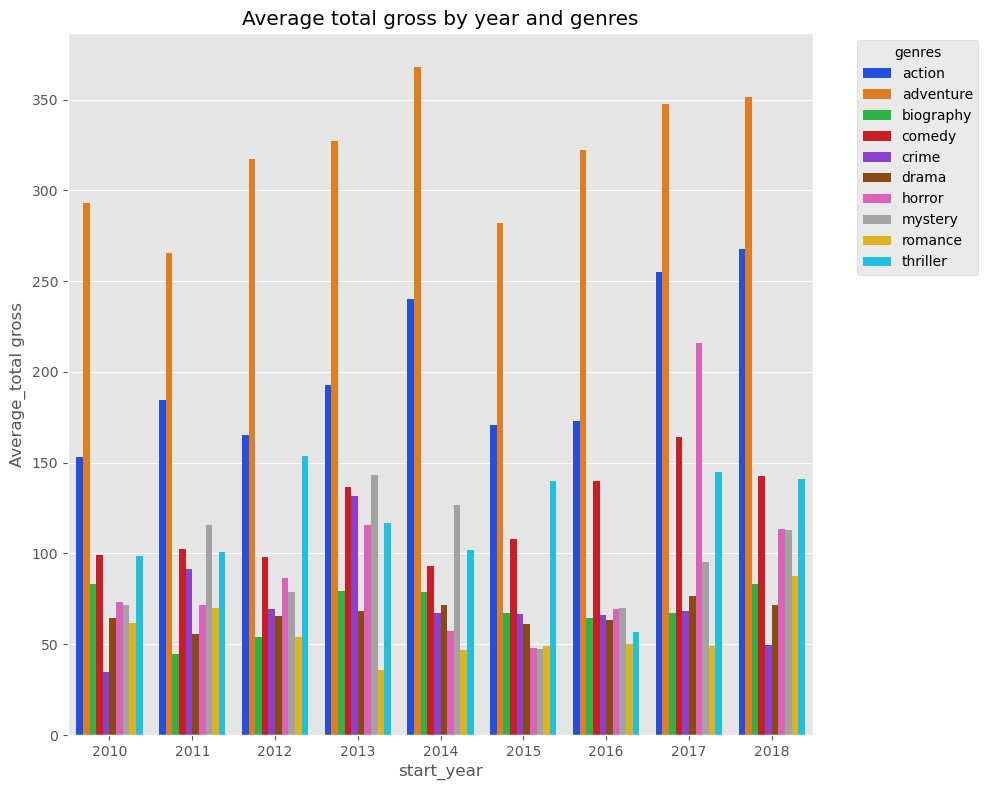

In [47]:
df['genres']=df['genres'].str.split(',')
df=df.explode('genres')
top_genres= df['genres'].value_counts().head(10).index.to_list()
df=df[df['genres'].isin(top_genres)]
grouped_df=df.groupby(['start_year','genres'])['total_gross'].mean().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(grouped_df,x='start_year',y='total_gross',hue='genres',palette='bright')
plt.title('Average total gross by year and genres')
plt.ylabel('Average_total gross')
plt.legend(title='genres',bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()
plt.savefig('genre_vs_year.png',bbox_inches='tight')
plt.show()

# Observations
The graph above shows the average box office gross have evolved overtime from 2010-2018 for the top 10 most popular genres.
***
Action based films and adventures have consistently given a lead for the highest average gross making them safe genres to fund across region and very ideal for big budgets

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***